# Mnist lab 

## Option 1: Using standard python libraries and using the csv dataset
## Option 2: Using tensorflow + keras (to review)

## Option 1: 
### Set the environment
1. Create the working directory called "sciencedonnees" based on the user's home
2. Download the mnist dataset in csv format.  it is also possible to download the original dataset from http://yann.lecun.com/exdb/mnist/ (gz files), decompress the files and then (a) convert the files to csv or (b) convert the files to a numpy array  

In [12]:
import urllib.request
import os
import csv

In [13]:
def set_environment(workpath, urls, files):
    ''' function to set the working directory, if it does not exist, 
        it will create it, and download the dataset'''
    if not os.path.exists(workpath):
        os.makedirs(workpath)
        
    for key, value in files.items():
        file_name = workpath+value
        print ('Downloading file: %s to %s %s' % (urls[key], file_name, '\n'))
        if os.path.isfile(file_name):
            print ('Skipping as %s already exist in %s %s' % (value, file_name, '\n') )
        else:
            download_file(urls[key], workpath+value)
            print ('done'+'\n')
    
        
def download_file(f_url,f_dest):
    '''function to download any file'''
    urllib.request.urlretrieve(f_url, f_dest)

#### If we want to use the original dataset, we can do it be defining the urls and files dictionaries as follows:

```python
urls={'train_images':'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
      'train_labels':'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
      'test_images':'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
      'test_labels':'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'}

files = {'train_images':'train-images-idx3-ubyte.gz',
         'train_labels':'train-labels-idx1-ubyte.gz',
         'test_images':'t10k-images-idx3-ubyte.gz',
         'test_labels':'t10k-labels-idx1-ubyte.gz'}
```

In [14]:
HOMEPATH = os.path.expanduser('~')
workpath = HOMEPATH+'/sciencedonnees/'
urls = {'train':'https://pjreddie.com/media/files/mnist_train.csv', 
        'test':'https://pjreddie.com/media/files/mnist_test.csv'}

files = {'train':'mnist_train.csv', 'test':'mnist_test.csv'}

set_environment(workpath, urls, files)


Skipping as mnist_train.csv already exist in C:\Users\charl/sciencedonnees/mnist_train.csv 


Skipping as mnist_test.csv already exist in C:\Users\charl/sciencedonnees/mnist_test.csv 



### get the train and test dataset as we need it

In [15]:
def get_dataset(ds_file):
    '''Open train and test datasets, read them and, store their records to a list'''
    with open (ds_file, 'r') as t_file:
        ds = csv.reader(t_file)
        records = []
        label = []
        dataset = []
        for line in ds:
            records.append([int(i) for i in line]) # list comprehension to convert lists' strings to ints on the fly        
        # separate col(0) - label from the rest of the list
        for line in records:
            label.append(line[0])
        for line in records:
            dataset.append(line[1:])
    return records,label,dataset

In [16]:
# get our datasets
raw_train_ds, train_labels, train_data = get_dataset(workpath+files['train'])
raw_test_ds, test_labels, test_data = get_dataset(workpath+files['test'])

#print (train_data[0])
#print (train_labels[0])

## Dataset test:  
1. Print the first 3 labels
2. Plot the first 3 entries in the training set to validate they match the labels

Label = 5


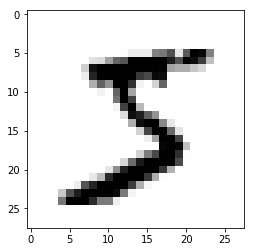

Label = 0


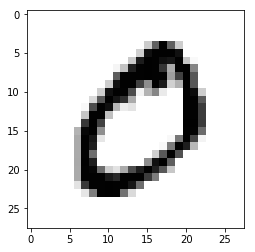

Label = 4


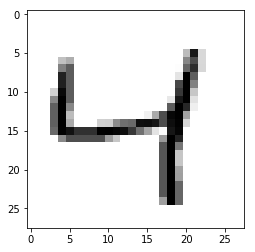

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#reshape gives a new shape to an array without changing its data.
for i in range(0,3):
    trainsetmtx = np.reshape(train_data[i], (28,28))
    imgplot = plt.imshow(trainsetmtx, cmap=plt.cm.get_cmap("gray_r"))
    print ('Label = %s' % train_labels[i]), plt.show()

**Proposed notion of similarity

We have to define our own measure of similarity, and compare its performance to the provided measures.

In [18]:
#Define similarity measure



# K-Mean

In [10]:
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn import neighbors, metrics
from sklearn.cluster import KMeans

# Binary partition

# PCoA

# Isomap

In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap
from sklearn import manifold

# KNN

In [ ]:
#http://scikit-learn.org/stable/modules/neighbors.html
from sklearn.neighbors import NearestNeighbors